In [1]:
import holidays

In [2]:
import pandas as pd

In [3]:
holidays=pd.DataFrame({'ds':list(holidays.IND(years=[2017,2018,2019,2020]).keys()),'holiday':list(holidays.IND(years=[2017,2018,2019,2020]).values())})

In [4]:
holidays

,ds,holiday
0,2017-01-14,Makar Sankranti / Pongal
1,2017-01-26,Republic Day
2,2017-08-15,Independence Day
3,2017-10-02,Gandhi Jayanti
4,2017-05-01,Labour Day
5,2017-12-25,Christmas
6,2018-01-14,Makar Sankranti / Pongal
7,2018-01-26,Republic Day
8,2018-08-15,Independence Day
9,2018-10-02,Gandhi Jayanti


In [5]:
from fbprophet import Prophet

In [6]:
import pandas as pd
train = pd.read_csv("../input/application-train/train.csv")
test= pd.read_csv("../input/test-data/test.csv")

In [7]:
test['application_date'].value_counts()

2019-08-30    2
2019-09-06    2
2019-08-09    2
2019-08-01    2
2019-08-03    2
             ..
2019-10-12    1
2019-10-17    1
2019-10-23    1
2019-10-18    1
2019-07-17    1
Name: application_date, Length: 111, dtype: int64

In [8]:
train[train['segment']==1]['application_date'].value_counts()

2018-10-17    83
2018-05-06    83
2018-11-21    83
2019-02-03    83
2018-01-08    83
              ..
2018-07-19    83
2018-10-08    83
2017-11-13    83
2017-12-14    83
2018-04-12    83
Name: application_date, Length: 806, dtype: int64

In [9]:
data4=train.drop(columns=['branch_id', 'state', 'zone'])

In [10]:
data4['application_date']=data4['application_date'].astype('datetime64')

In [11]:
data1 = data4[data4['segment']==1].groupby('application_date')['case_count'].sum().reset_index()

In [12]:
data1_2 = data4[data4['segment']==2].groupby('application_date')['case_count'].sum().reset_index()

In [13]:
data4

,application_date,segment,case_count
0,2017-04-01,1,40.0
1,2017-04-03,1,5.0
2,2017-04-04,1,4.0
3,2017-04-05,1,113.0
4,2017-04-07,1,76.0
...,...,...,...
80397,2019-07-19,2,1886.0
80398,2019-07-20,2,1480.0
80399,2019-07-21,2,1028.0
80400,2019-07-22,2,1946.0


In [14]:
data1['case_count'].value_counts()

2888.0     3
3519.0     3
3250.0     3
2693.0     3
1746.0     2
          ..
1582.0     1
1185.0     1
11594.0    1
3498.0     1
299.0      1
Name: case_count, Length: 734, dtype: int64

In [15]:
data2_2=data1_2.rename({'application_date':'ds','case_count':'y'},axis=1)

In [16]:
data2_2.columns

Index(['ds', 'y'], dtype='object')

In [17]:
data2=data1.rename({'application_date':'ds','case_count':'y'},axis=1)

In [18]:
data2

,ds,y
0,2017-04-01,299.0
1,2017-04-03,42.0
2,2017-04-04,23.0
3,2017-04-05,1530.0
4,2017-04-07,1341.0
...,...,...
801,2019-07-01,3650.0
802,2019-07-02,3212.0
803,2019-07-03,3824.0
804,2019-07-04,4240.0


In [19]:
m = Prophet(holidays=holidays)

m.fit(data2)

In [20]:
model2=Prophet(interval_width=0.95,  weekly_seasonality=True, holidays=holidays, changepoint_prior_scale=2)
model2.add_seasonality(name='weekly', period=7, fourier_order=3, prior_scale=0.1)
model2.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)

In [21]:
model2_2=Prophet(interval_width=0.95,  weekly_seasonality=True, holidays=holidays, changepoint_prior_scale=2)
model2_2.add_seasonality(name='weekly', period=7, fourier_order=3, prior_scale=0.1)
model2_2.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)

In [22]:
data2

,ds,y
0,2017-04-01,299.0
1,2017-04-03,42.0
2,2017-04-04,23.0
3,2017-04-05,1530.0
4,2017-04-07,1341.0
...,...,...
801,2019-07-01,3650.0
802,2019-07-02,3212.0
803,2019-07-03,3824.0
804,2019-07-04,4240.0


In [23]:
model2.fit(data2)

In [24]:
model2_2.fit(data2_2)

In [25]:
future = model2.make_future_dataframe(periods=300, freq='H')
fcst = model2.predict(future)

In [26]:
future_2 = model2_2.make_future_dataframe(periods=300, freq='H')
fcst_2 = model2_2.predict(future)

In [27]:
future = m.make_future_dataframe(periods=300, freq='H')
fcst = m.predict(future)


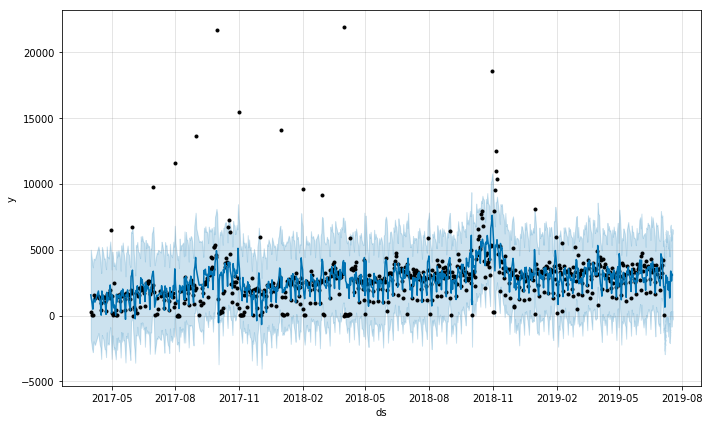

In [28]:
future = model2.make_future_dataframe(periods=300, freq='H')
fcst = model2.predict(future)
fig = model2.plot(fcst)

In [29]:
fcst[:807]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,Gandhi Jayanti,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-04-01 00:00:00,1060.699401,-1753.458250,4998.136712,1060.699401,1060.699401,0.0,0.0,0.0,0.0,...,-250.874115,-250.874115,-250.874115,200.424609,200.424609,200.424609,0.0,0.0,0.0,1568.762859
1,2017-04-03 00:00:00,1072.697464,-2556.613741,4050.230458,1072.697464,1072.697464,0.0,0.0,0.0,0.0,...,546.543902,546.543902,546.543902,145.094323,145.094323,145.094323,0.0,0.0,0.0,885.892311
2,2017-04-04 00:00:00,1078.696495,-2778.352763,3657.533941,1078.696495,1078.696495,0.0,0.0,0.0,0.0,...,120.254251,120.254251,120.254251,115.967611,115.967611,115.967611,0.0,0.0,0.0,481.854616
3,2017-04-05 00:00:00,1084.695527,-1949.556964,4319.475838,1084.695527,1084.695527,0.0,0.0,0.0,0.0,...,548.675448,548.675448,548.675448,86.702505,86.702505,86.702505,0.0,0.0,0.0,1255.779288
4,2017-04-07 00:00:00,1096.693589,-2228.174923,4246.040810,1096.693589,1096.693589,0.0,0.0,0.0,0.0,...,89.422919,89.422919,89.422919,30.248990,30.248990,30.248990,0.0,0.0,0.0,1019.438581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,2019-07-02 00:00:00,2708.484659,1334.058352,7459.410253,2708.484659,2708.484659,0.0,0.0,0.0,0.0,...,120.254251,120.254251,120.254251,136.931752,136.931752,136.931752,0.0,0.0,0.0,4447.247996
803,2019-07-03 00:00:00,2704.210966,1053.444553,7593.725775,2704.210966,2704.210966,0.0,0.0,0.0,0.0,...,548.675448,548.675448,548.675448,103.233911,103.233911,103.233911,0.0,0.0,0.0,4350.908387
804,2019-07-04 00:00:00,2699.937274,-482.891386,6279.048434,2699.937274,2699.937274,0.0,0.0,0.0,0.0,...,131.060460,131.060460,131.060460,70.773538,70.773538,70.773538,0.0,0.0,0.0,2985.878873
805,2019-07-05 00:00:00,2695.663582,-1132.193701,5529.226094,2695.663582,2695.663582,0.0,0.0,0.0,0.0,...,89.422919,89.422919,89.422919,39.691114,39.691114,39.691114,0.0,0.0,0.0,2138.472082


In [30]:
pd.DataFrame(fcst,data1['case_count']).trend

case_count
299.0     2807.470937
42.0      1354.641768
23.0      1234.671308
1530.0            NaN
1341.0            NaN
             ...     
3650.0            NaN
3212.0            NaN
3824.0            NaN
4240.0            NaN
13.0      1174.680996
Name: trend, Length: 806, dtype: float64

In [31]:
fcst[:807].yhat

0      1568.762859
1       885.892311
2       481.854616
3      1255.779288
4      1019.438581
          ...     
802    4447.247996
803    4350.908387
804    2985.878873
805    2138.472082
806    2148.175735
Name: yhat, Length: 807, dtype: float64

In [32]:
train.columns

Index(['application_date', 'segment', 'branch_id', 'state', 'zone',
       'case_count'],
      dtype='object')

In [33]:
data2=train.drop(columns=['segment', 'branch_id', 'state', 'zone'])

In [34]:
data2=data2.rename({'application_date':'ds','case_count':'y'},axis=1)

In [35]:
data2

,ds,y
0,2017-04-01,40.0
1,2017-04-03,5.0
2,2017-04-04,4.0
3,2017-04-05,113.0
4,2017-04-07,76.0
...,...,...
80397,2019-07-19,1886.0
80398,2019-07-20,1480.0
80399,2019-07-21,1028.0
80400,2019-07-22,1946.0


In [36]:
train.groupby(by='application_date')['case_count'].sum()

application_date
2017-04-01     1196.0
2017-04-02      605.0
2017-04-03     2058.0
2017-04-04     2268.0
2017-04-05     3945.0
               ...   
2019-07-19    29778.0
2019-07-20    26123.0
2019-07-21    12267.0
2019-07-22    27292.0
2019-07-23    29183.0
Name: case_count, Length: 844, dtype: float64

In [37]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [38]:
data2_2

,ds,y
0,2017-04-01,897.0
1,2017-04-02,605.0
2,2017-04-03,2016.0
3,2017-04-04,2245.0
4,2017-04-05,2415.0
...,...,...
839,2019-07-19,29778.0
840,2019-07-20,26123.0
841,2019-07-21,12267.0
842,2019-07-22,27292.0


In [39]:
mean_absolute_percentage_error(data2_2['y'][830:],fcst_2[830:844]['yhat'])

69.5431401720849

In [40]:
fcst[:806]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,Gandhi Jayanti,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-04-01,1060.699401,-1753.458250,4998.136712,1060.699401,1060.699401,0.0,0.0,0.0,0.0,...,-250.874115,-250.874115,-250.874115,200.424609,200.424609,200.424609,0.0,0.0,0.0,1568.762859
1,2017-04-03,1072.697464,-2556.613741,4050.230458,1072.697464,1072.697464,0.0,0.0,0.0,0.0,...,546.543902,546.543902,546.543902,145.094323,145.094323,145.094323,0.0,0.0,0.0,885.892311
2,2017-04-04,1078.696495,-2778.352763,3657.533941,1078.696495,1078.696495,0.0,0.0,0.0,0.0,...,120.254251,120.254251,120.254251,115.967611,115.967611,115.967611,0.0,0.0,0.0,481.854616
3,2017-04-05,1084.695527,-1949.556964,4319.475838,1084.695527,1084.695527,0.0,0.0,0.0,0.0,...,548.675448,548.675448,548.675448,86.702505,86.702505,86.702505,0.0,0.0,0.0,1255.779288
4,2017-04-07,1096.693589,-2228.174923,4246.040810,1096.693589,1096.693589,0.0,0.0,0.0,0.0,...,89.422919,89.422919,89.422919,30.248990,30.248990,30.248990,0.0,0.0,0.0,1019.438581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,2019-07-01,2712.758351,1300.068318,7916.572699,2712.758351,2712.758351,0.0,0.0,0.0,0.0,...,546.543902,546.543902,546.543902,171.684364,171.684364,171.684364,0.0,0.0,0.0,4682.890238
802,2019-07-02,2708.484659,1334.058352,7459.410253,2708.484659,2708.484659,0.0,0.0,0.0,0.0,...,120.254251,120.254251,120.254251,136.931752,136.931752,136.931752,0.0,0.0,0.0,4447.247996
803,2019-07-03,2704.210966,1053.444553,7593.725775,2704.210966,2704.210966,0.0,0.0,0.0,0.0,...,548.675448,548.675448,548.675448,103.233911,103.233911,103.233911,0.0,0.0,0.0,4350.908387
804,2019-07-04,2699.937274,-482.891386,6279.048434,2699.937274,2699.937274,0.0,0.0,0.0,0.0,...,131.060460,131.060460,131.060460,70.773538,70.773538,70.773538,0.0,0.0,0.0,2985.878873


In [41]:
future

,ds
0,2017-04-01 00:00:00
1,2017-04-03 00:00:00
2,2017-04-04 00:00:00
3,2017-04-05 00:00:00
4,2017-04-07 00:00:00
...,...
1101,2019-07-17 08:00:00
1102,2019-07-17 09:00:00
1103,2019-07-17 10:00:00
1104,2019-07-17 11:00:00


In [42]:
predict_seg_1=test[test['segment']==1]

In [43]:
predict_seg_2=test[test['segment']==2]

In [44]:
predict_seg_1.columns

Index(['id', 'application_date', 'segment'], dtype='object')

In [45]:
predict_seg_1.drop(columns=['id','segment'],inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
predict_seg_2.drop(columns=['id','segment'],inplace=True)

In [47]:
predict_seg_1.rename({'application_date':'ds'},inplace=True,axis=1)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
predict_seg_2.rename({'application_date':'ds'},inplace=True,axis=1)

In [49]:
predict_seg_1

,ds
0,2019-07-06
1,2019-07-07
2,2019-07-08
3,2019-07-09
4,2019-07-10
...,...
82,2019-09-26
83,2019-09-27
84,2019-09-28
85,2019-09-29


In [50]:
fcst_1 = model2.predict(predict_seg_1)

In [51]:
fcst_2=model2.predict(predict_seg_2)

In [52]:
fcst_2['yhat']

0     2692.330577
1     2515.418318
2     2540.237873
3     1980.145646
4      756.760274
         ...     
88    2398.920886
89    3878.381629
90    3232.450278
91    3675.510886
92    3482.353918
Name: yhat, Length: 93, dtype: float64

In [53]:
test1=test[test['segment']==1].copy()

In [54]:
final=pd.concat([fcst_1,fcst_2])

In [55]:
fcst.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Christmas', 'Christmas_lower', 'Christmas_upper', 'Gandhi Jayanti',
       'Gandhi Jayanti_lower', 'Gandhi Jayanti_upper', 'Independence Day',
       'Independence Day_lower', 'Independence Day_upper', 'Labour Day',
       'Labour Day_lower', 'Labour Day_upper', 'Makar Sankranti / Pongal',
       'Makar Sankranti / Pongal_lower', 'Makar Sankranti / Pongal_upper',
       'Republic Day', 'Republic Day_lower', 'Republic Day_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'holidays', 'holidays_lower', 'holidays_upper', 'monthly',
       'monthly_lower', 'monthly_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [56]:
fcst=final.drop(columns=[ 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Christmas', 'Christmas_lower', 'Christmas_upper', 'Gandhi Jayanti',
       'Gandhi Jayanti_lower', 'Gandhi Jayanti_upper', 'Independence Day',
       'Independence Day_lower', 'Independence Day_upper', 'Labour Day',
       'Labour Day_lower', 'Labour Day_upper', 'Makar Sankranti / Pongal',
       'Makar Sankranti / Pongal_lower', 'Makar Sankranti / Pongal_upper',
       'Republic Day', 'Republic Day_lower', 'Republic Day_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'holidays', 'holidays_lower', 'holidays_upper', 'monthly',
       'monthly_lower', 'monthly_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper'])

In [57]:
fcst.rename({"ds":"application_date","yhat":"case_count"},axis=1,inplace=True)

In [58]:
test['application_date']=test['application_date'].astype('datetime64')

In [59]:
fcst=fcst.reset_index()

In [60]:
test['case_count']=fcst['case_count']

In [61]:
test

,id,application_date,segment,case_count
0,1,2019-07-06,1,1530.543619
1,2,2019-07-07,1,821.592314
2,3,2019-07-08,1,2893.203615
3,4,2019-07-09,1,2575.235117
4,5,2019-07-10,1,2847.020765
...,...,...,...,...
175,176,2019-10-20,2,2398.920886
176,177,2019-10-21,2,3878.381629
177,178,2019-10-22,2,3232.450278
178,179,2019-10-23,2,3675.510886


In [62]:
test.to_csv('submission.csv',index=False)

In [63]:
test

,id,application_date,segment,case_count
0,1,2019-07-06,1,1530.543619
1,2,2019-07-07,1,821.592314
2,3,2019-07-08,1,2893.203615
3,4,2019-07-09,1,2575.235117
4,5,2019-07-10,1,2847.020765
...,...,...,...,...
175,176,2019-10-20,2,2398.920886
176,177,2019-10-21,2,3878.381629
177,178,2019-10-22,2,3232.450278
178,179,2019-10-23,2,3675.510886
